In [9]:
#Importando bibliotecas

import pandas as pd
import pandas_datareader.data as web
import datetime as dt
import matplotlib.pyplot as fig

Fazendo o web scrapping da carteira do IBOV direto do site da B3 e armazenando num data frame.

In [11]:
#Localização da tabela
url = "http://bvmf.bmfbovespa.com.br/indices/ResumoCarteiraTeorica.aspx?Indice=IBOV&idioma=pt-br"

#Aqui fazemos uns ajustes, já que no python o decimal é por '.', e os milhares por ','
#Colocamos o index das colunas como o código de negociação
#E não lemos a última linha da tabela
df = pd.read_html(url, decimal = ',', thousands = '.', index_col = 'Código')[0][:-1]

#Apresenta as linhas, da maior participação na carteira do IBOV, á menor.
ibov = df.sort_values('Part. (%)', ascending=False)

In [12]:
#Isso para definir o range de dados a se coletar do yahoo.
inicio = dt.datetime(2019, 1, 1) #Data inicio dos dados que iremos coletar
fim = dt.datetime(2020, 12, 27) #Data final dos dados que iremos coletar

num = 4 #Númeo de ativos que iremos usar
klist = []

for i in range(num):
    x = ibov.index[i]+'.SA'
    klist.append(x)

In [18]:
for i in range(num):
    y = web.DataReader(klist[i], 'yahoo', inicio, fim)
    if i == 0:
        ativo=pd.DataFrame(y['Close'].values)
        ativo=ativo.rename(columns={i:klist[i]}) #Se é a primeira linha, renomeia as colunas
    else:
        ativo[klist[i]]=pd.DataFrame(y['Close'].values)
        
ativo.index=y.index
print(ativo.head())

             VALE3.SA   ITUB4.SA   PETR4.SA   BBDC4.SA
Date                                                  
2019-01-02  51.090000  37.000000  24.059999  33.658298
2019-01-03  49.000000  37.610001  24.650000  33.983299
2019-01-04  52.189999  36.980000  24.719999  33.716702
2019-01-07  51.910000  37.049999  25.110001  34.116699
2019-01-08  52.410000  37.520000  24.959999  34.325001


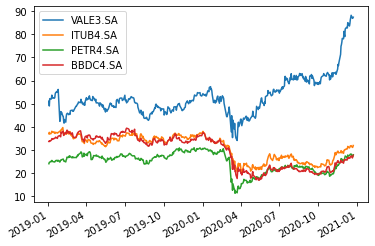

In [19]:
fig.plot(ativo)
fig.gcf().autofmt_xdate()
fig.legend(klist)